In [5]:
import pandas as pd

# Load data
file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed
df = pd.read_csv(file_path)

# Preview data
print("Shape of dataset:", df.shape)
print("Columns:")
print(df.columns.tolist())
df.head()

# Data types
print(df.info())

# Check missing values
print(df.isnull().sum())

def clean_rate(x):
    if isinstance(x, str):
        x = x.strip()
        if x in ['NEW', '-', '']:
            return None
        else:
            return float(x.split('/')[0])
    return None

df['rate_cleaned'] = df['rate'].apply(clean_rate)

# Check cleaned values
print(df[['rate', 'rate_cleaned']].head())

# Summary of cleaned ratings
print(df['rate_cleaned'].describe())


Shape of dataset: (148, 7)
Columns:
['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two p

<>:4: SyntaxWarning: invalid escape sequence '\z'
<>:4: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16784\579642550.py:4: SyntaxWarning: invalid escape sequence '\z'
  file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed


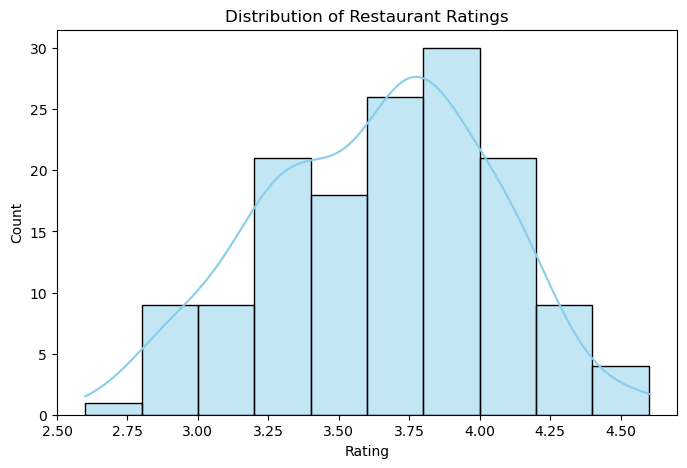

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['rate_cleaned'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


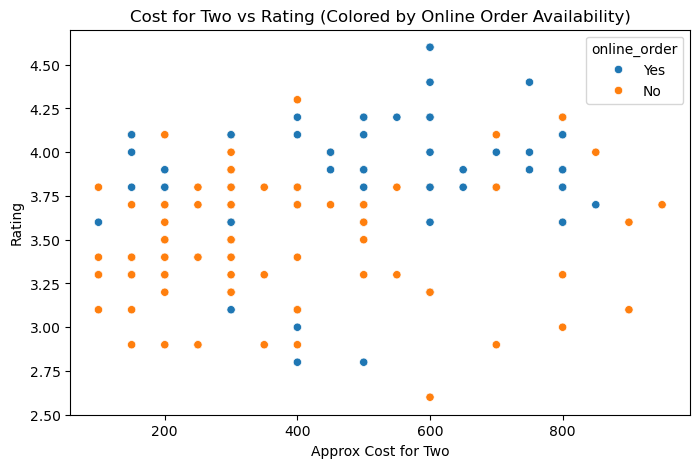

In [3]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate_cleaned', data=df, hue='online_order')
plt.title('Cost for Two vs Rating (Colored by Online Order Availability)')
plt.xlabel('Approx Cost for Two')
plt.ylabel('Rating')
plt.show()


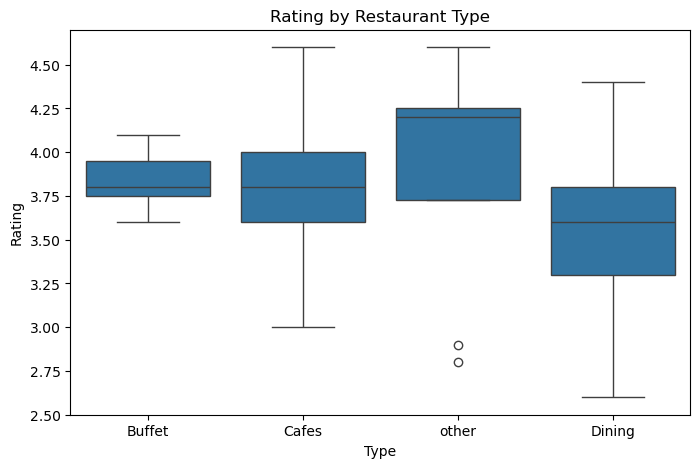

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x='listed_in(type)', y='rate_cleaned', data=df)
plt.title('Rating by Restaurant Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()


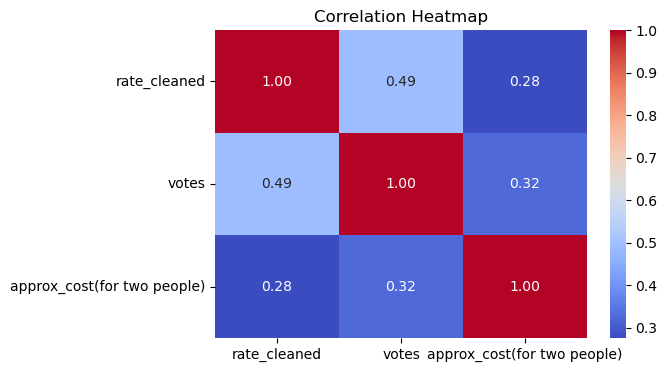

In [5]:
import numpy as np

# Only numeric columns
num_df = df[['rate_cleaned', 'votes', 'approx_cost(for two people)']]

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


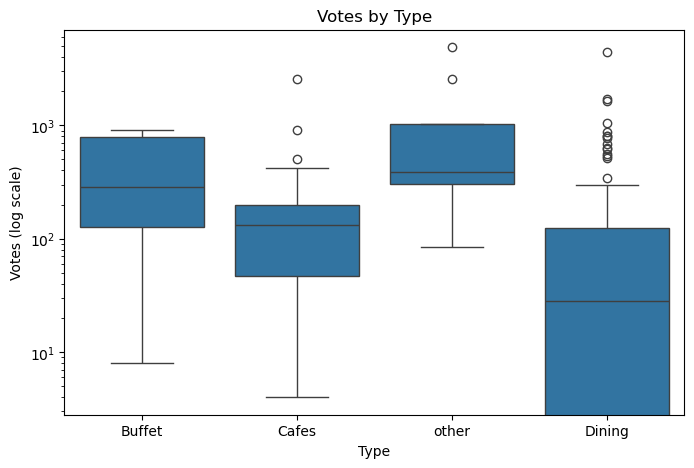

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='listed_in(type)', y='votes', data=df)
plt.yscale('log')  # in case votes are skewed
plt.title('Votes by Type')
plt.xlabel('Type')
plt.ylabel('Votes (log scale)')
plt.show()


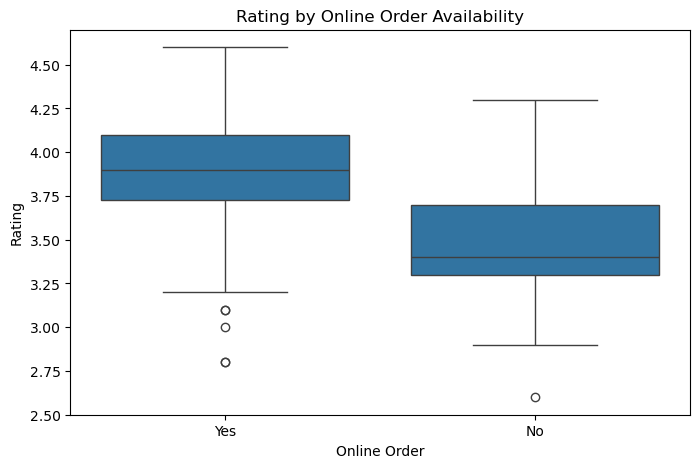

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='online_order', y='rate_cleaned', data=df)
plt.title('Rating by Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()


In [8]:
import plotly.express as px

fig = px.scatter_3d(df, x='approx_cost(for two people)', y='votes', z='rate_cleaned',
                    color='listed_in(type)', size='votes', opacity=0.7,
                    title='Votes, Cost and Rating 3D Scatter')
fig.show()


In [9]:
top_names = df['name'].value_counts().head(10)
print(top_names)


name
San Churro Cafe               2
CAFE NOVA                     2
Onesta                        2
Jalsa                         1
Kotian Karavali Restaurant    1
Kaggis                        1
Ayda Persian Kitchen          1
Chatar Patar                  1
Polar Bear                    1
Kidambi's Kitchen             1
Name: count, dtype: int64


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



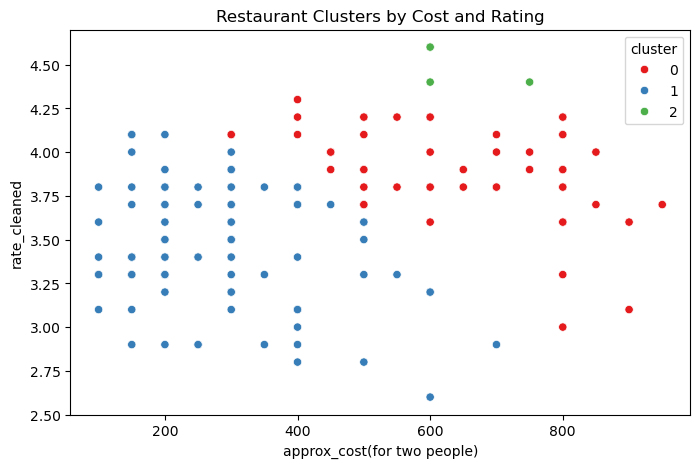

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['rate_cleaned', 'approx_cost(for two people)', 'votes']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate_cleaned', hue='cluster', data=df, palette='Set1')
plt.title('Restaurant Clusters by Cost and Rating')
plt.show()


RMSE for rating prediction: 0.50
approx_cost(for two people)    0.402616
online_order_Yes               0.350990
listed_in(type)_other          0.081488
listed_in(type)_Dining         0.066940
book_table_Yes                 0.051399
listed_in(type)_Cafes          0.046567
dtype: float64


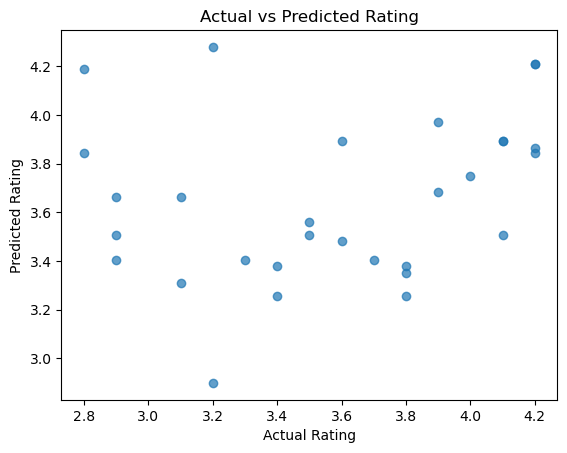

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Prepare features + target
X = pd.get_dummies(df[['online_order', 'book_table', 'approx_cost(for two people)', 'listed_in(type)']], drop_first=True)
y = df['rate_cleaned']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE for rating prediction: {rmse:.2f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')
plt.show()


In [6]:
# Install mlxtend if you haven't
# %pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Select relevant columns
service_df = df[['online_order', 'book_table', 'listed_in(type)']]

# One-hot encode
service_df_encoded = pd.get_dummies(service_df)

# Generate frequent itemsets
frequent_itemsets = apriori(service_df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show top rules by lift
top_rules = rules.sort_values('lift', ascending=False).head()
print("\nTop Association Rules by Lift:\n")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# OPTIONAL: Filter strong rules (lift > 1.2, confidence > 0.6)
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.6)]
print("\nStrong Rules (lift > 1.2 and confidence > 0.6):\n")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Top Association Rules by Lift:

                                antecedents  \
4                        (online_order_Yes)   
5                   (listed_in(type)_Cafes)   
8   (book_table_No, listed_in(type)_Dining)   
13                        (online_order_No)   
2                  (listed_in(type)_Dining)   

                                consequents   support  confidence      lift  
4                   (listed_in(type)_Cafes)  0.101351    0.258621  1.664168  
5                        (online_order_Yes)  0.101351    0.652174  1.664168  
8                         (online_order_No)  0.513514    0.703704  1.157202  
13  (book_table_No, listed_in(type)_Dining)  0.513514    0.844444  1.157202  
2                         (online_order_No)  0.520270    0.700000  1.151111  

Strong Rules (lift > 1.2 and confidence > 0.6):

               antecedents         consequents   support  confidence      lift
5  (listed_in(type)_Cafes)  (online_order_Yes)  0.101351    0.652174  1.664168


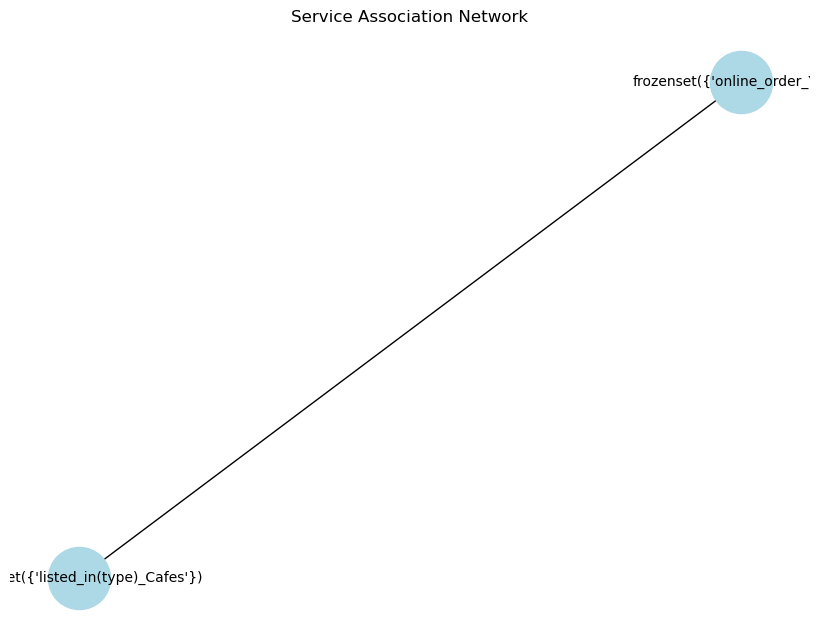

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(
    strong_rules,
    source='antecedents',
    target='consequents',
    edge_attr=True
)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.title('Service Association Network')
plt.show()

